In [136]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [62]:
data=pd.read_csv("happiness_score.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [63]:
df=pd.DataFrame(data)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


EDA PROCESS

In [64]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [65]:
df.shape

(158, 12)

In [66]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [67]:
list=["Country","Region","Happiness Rank"]
for i in list:
    df.drop(i,axis=1,inplace=True)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [68]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [69]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [70]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Happiness Score                     AxesSubplot(0.125,0.749828;0.133621x0.130172)
Standard Error                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Economy (GDP per Capita)          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Family                           AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Health (Life Expectancy)         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Freedom                             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Trust (Government Corruption)    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Generosity                        AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Dystopia Residual                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

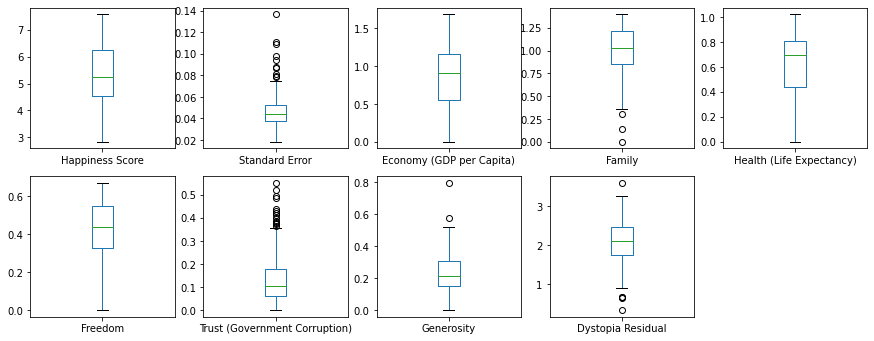

In [71]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

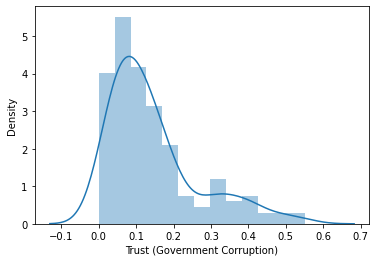

In [72]:
sns.distplot(df["Trust (Government Corruption)"])

Trust (Government Corruption) column data is slightly left skewed thus outliers are present

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [74]:
df_new=df[(z<3).all(axis=1)]
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [75]:
df.shape

(158, 9)

In [76]:
149/158 

0.9430379746835443

thus less than 6% data is removed by using z-score.so,the actual data is not much affected

In [77]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

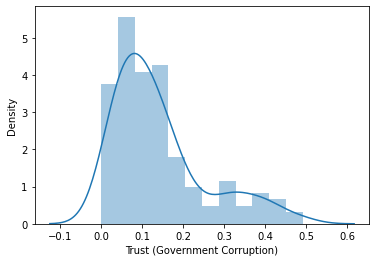

In [78]:
sns.distplot(df_new["Trust (Government Corruption)"])

<AxesSubplot:>

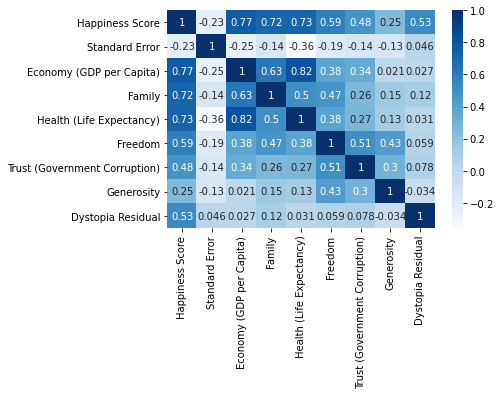

In [79]:
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

MACHINE LEARNING PROCESS

In [80]:
x=df_new.iloc[:,1:]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [81]:
y=df_new.iloc[:,0]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

choosing the best random state

In [117]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=LinearRegression()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.9999999490315852 on random state 194


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=194)

In [139]:
from sklearn.linear_model import SGDRegressor
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor(),Lasso(alpha=0.0001),SGDRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(pred,y_test))
    print("score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred,y_test)
    rmse=math.sqrt(mse)
    print(rmse)

0.9999999490315852
score= 0.999999928149097
0.00028118167094091207
0.7929631492945847
score= 1.0
0.48169995271376614
0.9799576905915665
score= 0.9934173522408071
0.16547710870845675
0.840179701798865
score= 0.9837248802349439
0.3920000045634916
0.9105914078721994
score= 0.9584238596119805
0.32076187221468
0.999999016750567
score= 0.9999987184755117
0.001234303929055882
0.9533801374920248
score= 0.9512578382912644
0.23899271606916542


CROSS VALIDATION PROCESS

In [140]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor(),Lasso(alpha=0.0001),SGDRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std_score=",score.std())

score= [0.99999943 0.99999847 0.99999831 0.99999509 0.99999933]
mean_score= 0.9999981234686345
std_score= 1.5837827108856898e-06
score= [ -5.47267843  -8.22483024  -5.4223691  -14.52078435  -6.05488594]
mean_score= -7.939109610944916
std_score= 3.445798690877821
score= [-0.86477957  0.85075514  0.83790056  0.68647261 -0.36507184]
mean_score= 0.22905537831180584
std_score= 0.7093511989882433
score= [-7.35398616 -0.9209656  -0.43029467 -2.63088739 -6.13254282]
mean_score= -3.4937353279829937
std_score= 2.778962425668223
score= [-7.02483867 -1.47073783 -0.61969976 -3.62749463 -5.30036315]
mean_score= -3.6086268080041686
std_score= 2.367998543989
score= [0.99973492 0.99998977 0.99997313 0.99995805 0.99997912]
mean_score= 0.9999269972930588
std_score= 9.65871222389261e-05
score= [-1.56355501  0.52573114  0.1353749  -1.30828156  0.61941673]
mean_score= -0.31826276005856313
std_score= 0.9304026720575364


Linear Regression is the best fit model as there is less diff between cross_val_score and the actual accuracy 

HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [121]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameters={"fit_intercept":[True,False],"normalize":[True,False],"n_jobs": np.arange(2,10),"copy_X":[True,False]}

In [127]:
gcv=GridSearchCV(LinearRegression(),parameters,cv=5)

In [128]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': [True, False]})

In [129]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 2, 'normalize': True}

In [138]:
final_model=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=2, normalize=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.999999948933489
score= 0.9999999280632851
0.0002814541682465973


saving the best model

In [141]:
import joblib

joblib.dump(final_model,"happinessfile.obj")

['happinessfile.obj']

In [143]:
happinessfile_from_joblib=joblib.load("happinessfile.obj")
happinessfile_from_joblib.predict(x_test)

array([3.66722646, 5.10157142, 3.6809143 , 7.27767784, 7.37811484,
       6.93729216, 4.36924577, 4.29259425, 4.7385695 , 7.58687382,
       4.78794367, 4.69401195, 6.78621019, 6.98254983, 4.55062553,
       6.66969827, 4.41932813, 3.78084888, 7.52215108, 5.25283419,
       6.81019431, 5.83257021, 4.97123135, 5.95962707, 5.68872568,
       4.43561396, 6.86720436, 5.2118913 , 3.9556981 , 6.3288412 ,
       4.51440617, 7.18730345, 6.13015844, 4.5123366 , 5.58866497,
       4.03301142, 6.00272895, 5.71574912, 7.28603937, 3.586885  ,
       5.12310717, 5.82408768, 4.33200998, 7.22568752, 3.65508229])